In [5]:
import pandas as pd
import numpy as np
# first, we load the dataset
df = pd.read_csv('advertising.csv')
df




TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

In [6]:
# now we take first few rows of dataset by using head
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [7]:
# here we display information of titanic dataset
print("Data Info:")
print(df.info(),"\n")


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None 



In [8]:
# here we display the summary of statistics of our dataset by using describe function
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [9]:
print("Data Shape",df.shape)


Data Shape (200, 4)


In [10]:
# Find number of missing values in each column
print("Missing values:\n",df.isnull().sum())


Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [11]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 3)
y_train shape: (160,)
X_test shape: (40, 3)
y_test shape: (40,)


In [13]:
# for model selection we using linear Regression 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [14]:
from sklearn.linear_model import LinearRegression
# using this to find out the best prediction and least error 
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.7052146229349234

In [15]:
from sklearn.model_selection import cross_val_score 

#Getting Cross Validation scores of Models

scores = cross_val_score(lr, X_test, y_test, scoring = 'neg_mean_squared_error',cv = 5)
print("Scores: \n", scores)
print("Mean: \n", scores.mean())
print("Std Deviation: \n", scores.std())

Scores: 
 [-3.45737496 -3.2745485  -1.53331583 -2.20332014 -5.45659459]
Mean: 
 -3.1850308039745685
Std Deviation: 
 1.33672023669355


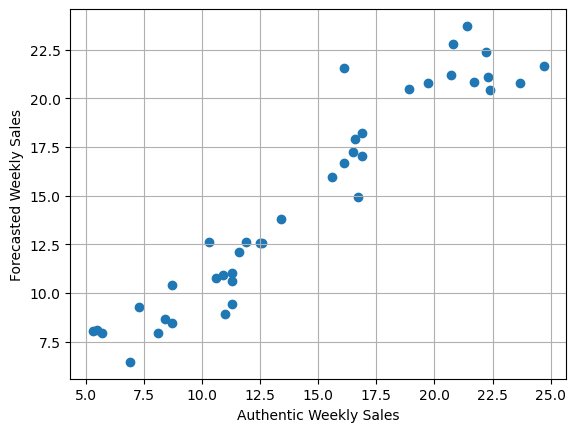

In [16]:
import matplotlib.pyplot as plt
# we use scatter plot here

plt.scatter(y_test, y_pred)
plt.xlabel('Authentic Weekly Sales')
plt.ylabel('Forecasted Weekly Sales')
plt.grid(True)

In [17]:
#Making a Dataframe for the predicted sales
predicted_dataset = pd.DataFrame(np.c_[y_test,y_pred], columns=["Actual Sales","Predicted Sales"])
predicted_dataset.head()

Actual Sales  Predicted Sales
0          16.9        17.034772
1          22.4        20.409740
2          21.4        23.723989
3           7.3         9.272785
4          24.7        21.682719

In [18]:
import sklearn
print("The Accuracy of the model is: ",sklearn.metrics.r2_score(y_test, y_pred)*100)

The Accuracy of the model is:  90.59011844150825


In [19]:
import seaborn as sns
# Correlation matrix

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [21]:
#Getting the coorelation
corr = df.corr()['Sales']
corr

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64

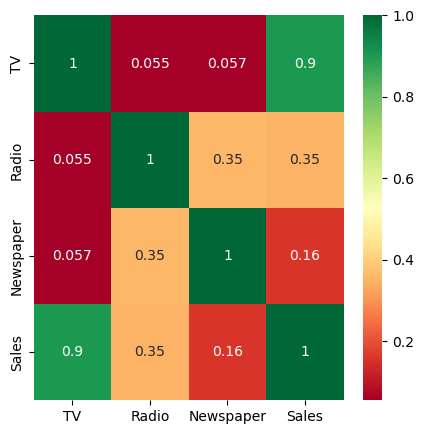

In [23]:
#Plotting Coorelation using Heatmap
plt.figure(figsize=(5,5))
g = sns.heatmap(df.corr(),annot=True, cmap="RdYlGn")